### 1. Import the neccessary packages.

In [22]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
import re 
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Read the dataset and clean it.

In [2]:
path = path = '/Users/kaylanguyen/Documents/TheNLPWorkshop/Activities/'
data = pd.read_csv(path + 'news_political_dataset.csv')
data.head()

,headline,short_description,is_political
0,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.,0
1,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...,0
2,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...,0
3,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ...",0
4,Morgan Freeman 'Devastated' That Sexual Harass...,"""It is not right to equate horrific incidents ...",0


In [3]:
data.shape

(69505, 3)

In [4]:
data.columns

Index(['headline', 'short_description', 'is_political'], dtype='object')

In [5]:
# for i in data['short_description']:
#     print(i)

In [6]:
# for i in data['headline']:
#     print(i)

In [7]:
print(list(string.printable))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', ' ', '\t', '\n', '\r', '\x0b', '\x0c']


In [8]:
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')
stop_words = stop_words + list(string.printable)
data['cleaned_headline_text'] = data['short_description'].apply(\
lambda x : ' '.join([lemmatizer.lemmatize(word.lower()) \
    for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', str(x)))\
                     if word.lower() not in stop_words]))
data.head()

,headline,short_description,is_political,cleaned_headline_text
0,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.,0,course song
1,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...,0,actor longtime girlfriend anna eberstein tied ...
2,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...,0,actor give dems as kicking fighting hard enoug...
3,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ...",0,dietland actress said using bag really cathart...
4,Morgan Freeman 'Devastated' That Sexual Harass...,"""It is not right to equate horrific incidents ...",0,right equate horrific incident sexual assault ...


In [9]:
# for i in data['cleaned_headline_text']:
#     print(i)

### 3. Create a TFIDF matrix out of it.

In [12]:
MAX_FEATURES = 200
tfidf_model = TfidfVectorizer(max_features=MAX_FEATURES)
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(data['cleaned_headline_text']).todense())
tfidf_df.columns = sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,10,administration,already,also,always,america,american,another,around,away,...,white,win,without,woman,work,world,would,year,yet,york
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4. Divide the data into training and validation sets.

In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(tfidf_df, 
                                                      data['is_political'],
                                                      test_size=0.2,
                                                      random_state=42,
                                                      stratify = data['is_political'])

### 5. Develop classifier models for the dataset.

In [16]:
def clf_model(model_type, X_train, y_train, X_valid):
    model = model_type.fit(X_train, y_train)
    predicted_labels = model.predict(X_valid)
    predicted_probab = model.predict_proba(X_valid)[:,1]
    return [predicted_labels, predicted_probab, model]

In [17]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(n_estimators=10, learning_rate=0.05,
                        max_depth=18, subsample=0.6,
                        colsample_bytree= 0.6,reg_alpha= 10,seed=42)
results = clf_model(xgb_clf, X_train, y_train, X_valid)

### 6. Evaluate the models that were developed using parameters such as confusion matrix, accuracy, precision, recall, F1 plot curve, and ROC curve

In [18]:
def model_evaluation(actual_values, predicted_values, predicted_probabilities):
    cfn_mat = confusion_matrix(actual_values,predicted_values)
    print("confusion matrix: \n",cfn_mat)
    print("\naccuracy: ",accuracy_score(actual_values,predicted_values))
    print("\nclassification report: \n", classification_report(actual_values,predicted_values))
    fpr,tpr,threshold=roc_curve(actual_values, predicted_probabilities)
    print ('\nArea under ROC curve for validation set:', auc(fpr,tpr))
    fig, ax = plt.subplots(figsize=(6,6))
    ax.plot(fpr,tpr,label='Validation set AUC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    ax.legend(loc='best')
    plt.show()


confusion matrix: 
 [[6842  511]
 [3468 3080]]

accuracy:  0.7137615998849004

classification report: 
               precision    recall  f1-score   support

           0       0.66      0.93      0.77      7353
           1       0.86      0.47      0.61      6548

    accuracy                           0.71     13901
   macro avg       0.76      0.70      0.69     13901
weighted avg       0.76      0.71      0.70     13901


Area under ROC curve for validation set: 0.7514744604095703


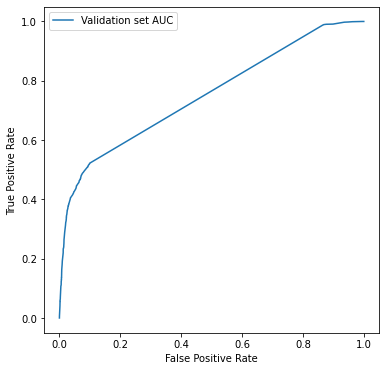

In [23]:
model_evaluation(y_valid, results[0], results[1])
model_xgb = results[2]

In [24]:
word_importances = pd.DataFrame({'word':X_train.columns,'importance':model_xgb.feature_importances_})
word_importances.sort_values('importance', ascending = False).head(4)

,word,importance
178,trump,0.205034
136,president,0.099847
144,republican,0.068011
160,state,0.047097
